# **Python for data science and data analysis from scratch**

Librerías que utilizaremos en esta sesión

**numpy**

**matplotlib**



---



**tensorflow**

Plataforma de código abierto para machine learning, fue desarrollada por Google.

**keras**

Librería de código libre para redes neuronales en Python.




Las redes neuronales son un conjunto de algoritmos diseñados especialmente para reconocer patrones.

Pueden resolver problemas que son fáciles para un humano, pero complejos para un algoritmo.

Las redes neuronales intentan emular la forma en la que creemos funciona el cerebro humano.

Éstas redes están constituídas por entidades llamadas **neuronas**. 

Las neuronas reciben datos de entrada de otras neuronas, los procesan, y producen datos de salida que envian a otras neuronas, con tantos niveles o capas como deseemos, hasta que la información llega a las últimas neuronas de la red, que muestran el resultado que buscamos.

Cada conexión entre dos neuronas tiene un peso distinto. Al peso le llamamos w, del inglés weight.

![red neuronal](https://mongemalo.com/wp-content/uploads/2018/12/red-neuronal-1024x753.jpg)

Los datos que llegan a cada neurona se pasan por una función matemática llamada de activación. Como lo que queremos es que la red sea capaz de resolver problemas cada vez más complejos, las funciones de activación generalmente harán que los modelos sean no lineales. 

[Visualización interactiva de redes neuronales.](https://playground.tensorflow.org/)


El dataset que usaremos es el de Fashion-MNIST, el cual consiste en un conjunto de 60,000 imágenes de prendas para entrenamiento y 10,000 para ejemplos de prueba.

Cada ejemplo es una imagen de 28X28 pixeles, en escala de grises, con una de 10 posibles etiquetas asignada.

<img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">

Para nuestra sesión usaremos las redes neuronales para predecir que tipo de prenda estamos viendo en la imagen.

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



4423680/4422102 [==============================] - 0s 0us/step


In [0]:
print(train_images)
print(train_labels)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[9 0 0 ... 3 0 5]


Al cargar el dataset regresa 4 arreglos NumPy.

Las etiquetas corresponden a los siguientes clases:

<table>
  <tbody><tr>
    <th>Etiqueta</th>
    <th>Clase</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</tbody></table>

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [0]:
train_images.shape

(60000, 28, 28)

## Pre procesamiento de los datos

Los datos deben ser pre procesados antes de entrenar la red. 

Si inspeccionamos las imágenes veremos que los valores caen en el rango de 0 a 255.

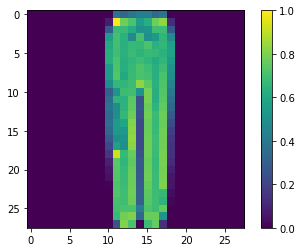

In [0]:
plt.figure()
plt.imshow(train_images[1000])
plt.colorbar()
plt.grid(False)
plt.show()



Necesitamos escalar los valores a un rango entre 0 y 1 antes de alimentar la red neuronal. 

Es importante pre procesar ambos dataset, el de entrenamiento y pruebas.

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0


Para verificar que los datos están etiquetados correctamente mostramos los primeros 25 ejemplos con sus etiquetas:

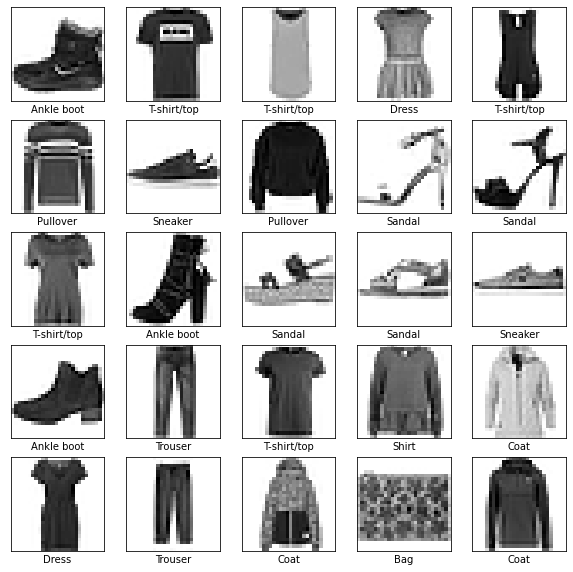

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


## Construir el modelo

Construirlo requiere configurar sus capas y después compilarlo.

### Configurar las capas

Las capas extraen representaciones de loos datos que las alimentaron.

La primer capa de la red, transforma el formato de la imagen de un arreglo de dos dimensiones (28X28) a un arreglo lineal de 784 elementos. Esta capa no aprende, solo da formato a los datos.

Después hay dos capas `tf.keras.layers.Dense`. La segunda, regresa un arreglo de longitud 10.





In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])


### Compilar el modelo

Hay algunos parámetros que tenemos que especificar antes de compilar el modelo:

* La función de pérdida (loss).

* Un Optimizador (optimizer).

* Un conjunto de métricas para medir el modelo (metrics).

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


## Entrenar el modelo

Entrenar al modelo requiere los siguientes pasos:

1. Alimentar los datos de entrenamiento al modelo.
2. El modelo aprende a asociar imágenes y etiquetas.
3. Pedimos al modelo que realice predicciones sobre el dataset de pruebas.
4. Verificamos que las predicciones coincidan con las etiquetas en el arreglo de test_labels

### Alimentar al modelo

Con 10 vueltas o pasos.


In [0]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4963 - accuracy: 0.8257
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3746 - accuracy: 0.8633
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3346 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3092 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2923 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2749 - accuracy: 0.8978
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2637 - accuracy: 0.9015
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2536 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2446 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.235

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.3379 - accuracy: 0.8785

Test accuracy: 0.8784999847412109


In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


### Hacer predicciones


In [0]:
predictions = probability_model.predict(test_images)


In [0]:
predictions[0]


array([8.4885933e-08, 2.6535913e-08, 3.6952095e-08, 4.1922098e-07,
       1.5677578e-07, 3.9893258e-04, 1.4559554e-07, 5.4592896e-02,
       1.4278144e-06, 9.4500583e-01], dtype=float32)

In [0]:
np.argmax(predictions[1000])


6

In [0]:
test_labels[1000]


0

### Verificar predicciones

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


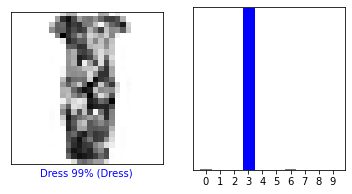

In [0]:
i = 100
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


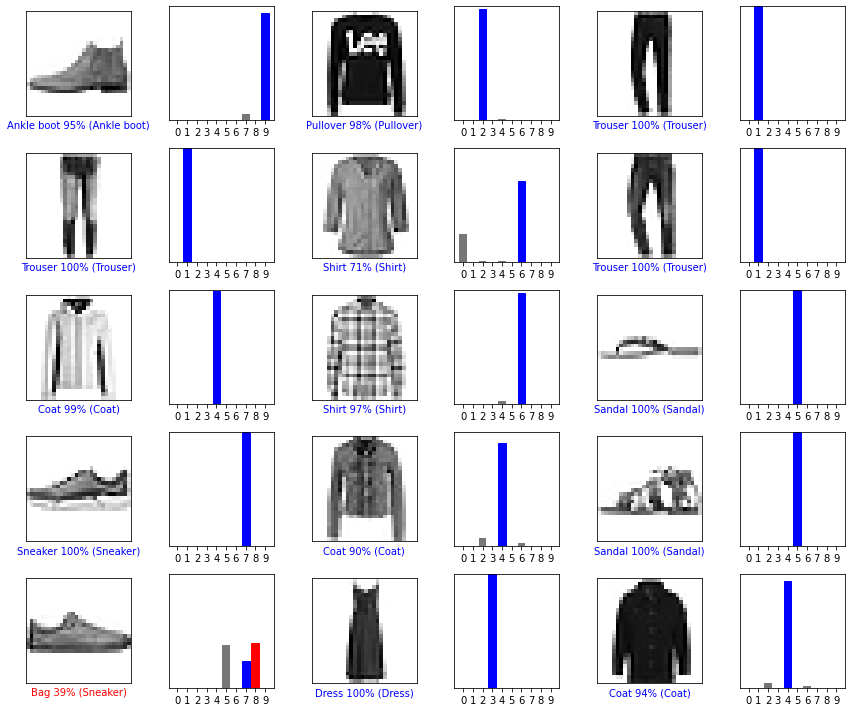

In [0]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


**Ejercicio**

Utilizar el dataset de MNIST y entrenar una red neuronal para predecir que dígito aparece en una imagen.
Cuántos nodos en la primera y última capa vamos a necesitar?

Otros dataset que Keras incluye: [jovianlin.io/datasets-within-keras](https://jovianlin.io/datasets-within-keras).

In [0]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
